<a href="https://colab.research.google.com/github/kuldip-datascience/Play_store_eda/blob/main/Kuldip_parmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Play Store Apps Data Analysis (EDA)**

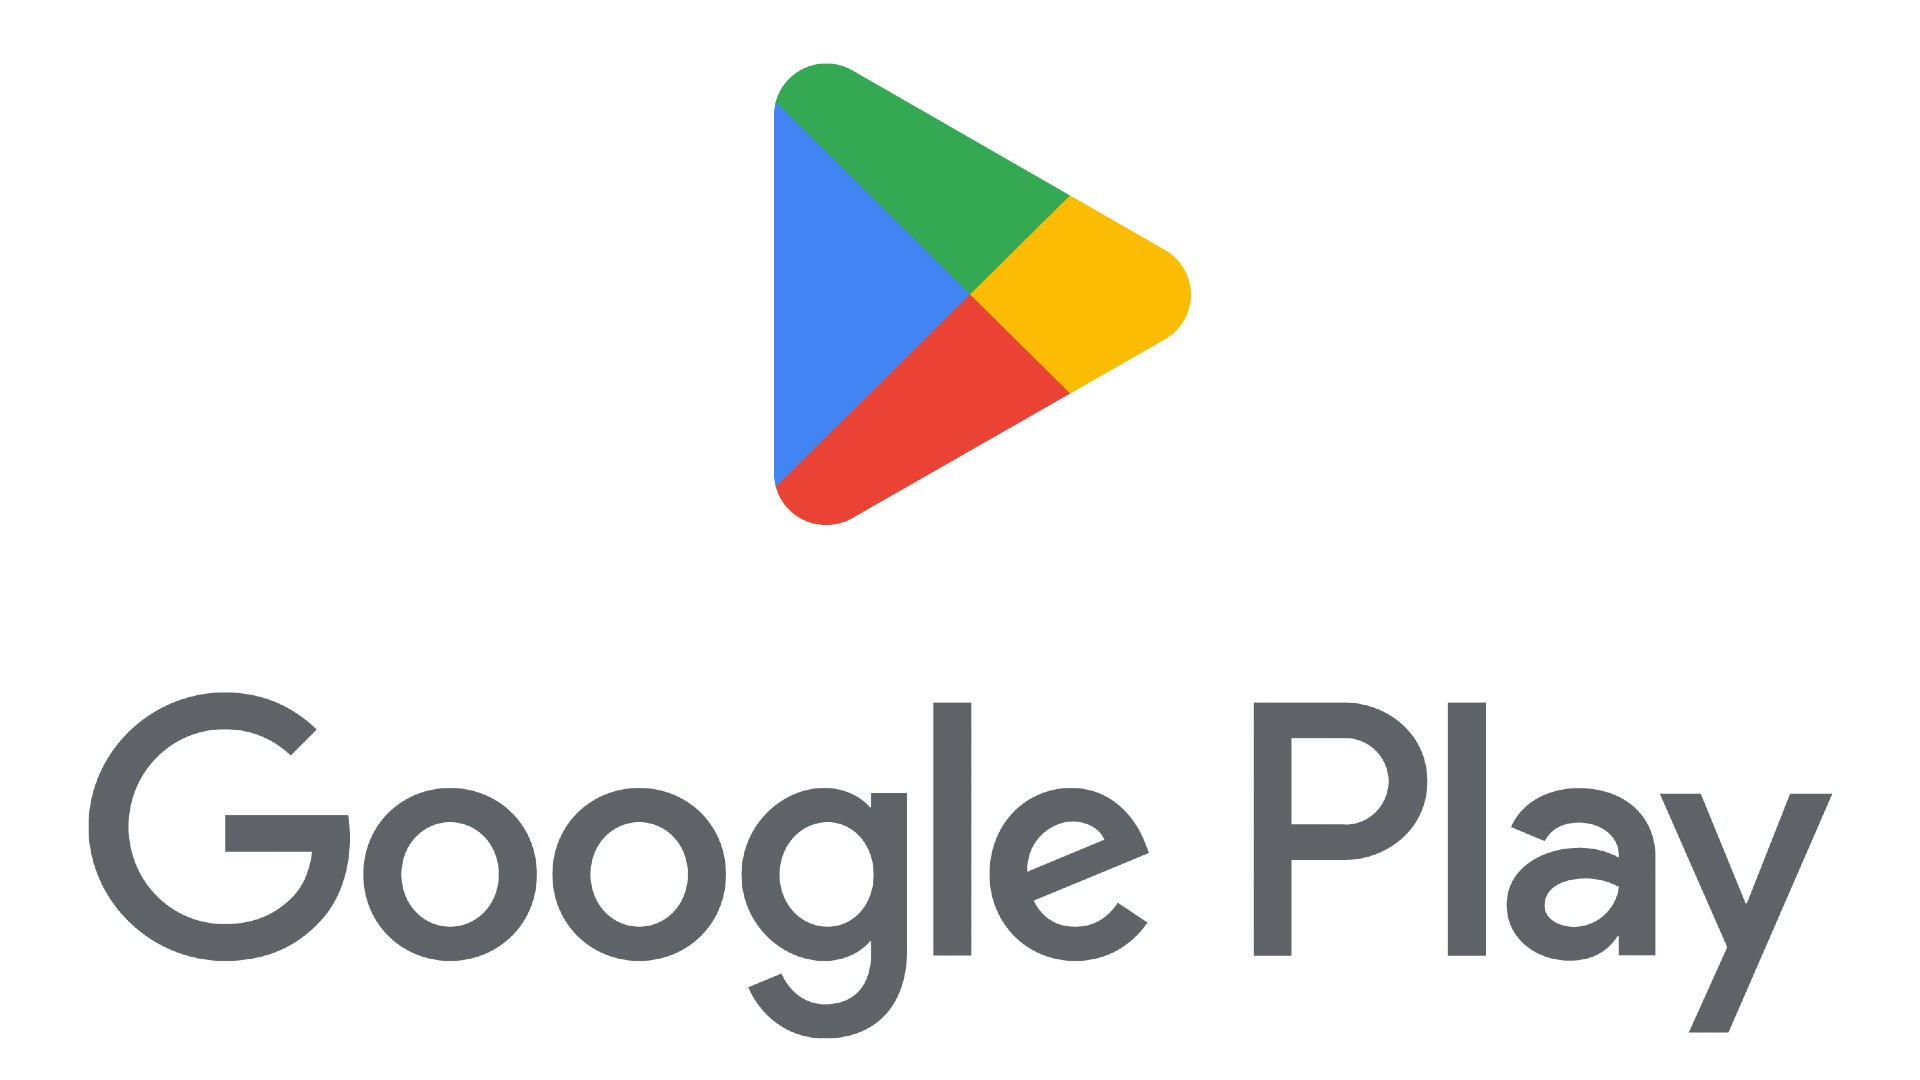

* Play Store Has many Applications and Based on their customer segmentations or 
feedback they can drives a misson to grow a business it could be for themselves or for another Company or Industry or Developer.

* Each app has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

* We'll Explore and analyze the data to discover key factors responsible for app engagement and success.

# **1) IMPORTED LIBRARIES**

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **2) LOAD DATASET INTO PANDAS**

In [209]:
play_store=pd.read_csv('/content/drive/MyDrive/Capstone Projects/play-store review/Copy of Play Store Data.csv')

# **3) ANALYSIS OF DATASET**



**3.1 - We will understand first the columns and rows and the information associated within.**

In [210]:
# now we check the complete dataset
play_store.head().T

,0,1,2,3,4
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159,967,87510,215644,967
Size,19M,14M,8.7M,25M,2.8M
Installs,"10,000+","500,000+","5,000,000+","50,000,000+","100,000+"
Type,Free,Free,Free,Free,Free
Price,0,0,0,0,0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity


In [211]:
# first we get the summary of dataset playstore
play_store.info()

# dataset has 13 columns and 10841 rows with null values in some columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB




**3.2 - Description of dataset**




In [212]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000




**3.3 - Available columns are there in dataset**



In [213]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **4) DATA CLEANING AND FILL MISSING DATA** 


**4.0.1 - Let's first find Null values presented in each column.**



In [214]:
# play_store.shape[0]
# null_value_check=pd.dataframe("")

NaN_Checker = pd.DataFrame({"Total Values": play_store.shape[0] , "No of NaN values":play_store.isnull().sum() })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,Total Values,No of NaN values
Rating,10841,1474
Current Ver,10841,8
Android Ver,10841,3
Type,10841,1
Content Rating,10841,1
App,10841,0
Category,10841,0
Reviews,10841,0
Size,10841,0
Installs,10841,0




**4.0.2 - Now, we replace some columns name which have space between their name.**



In [215]:
print("Before updating columns name :\n\n",play_store.columns)

Before updating columns name :

 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [216]:
play_store.columns = [col_name.replace(' ','_') for col_name in play_store.columns]

print("After updating columns name :\n\n",play_store.columns)

After updating columns name :

 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')




**4.0.3 - Now we do some cleaning and replace null and missing values of columns one by one.**



# 4.1 - *Installs* Column Cleaning 





**4.1.1 - Let's see the data**



In [217]:
# type of installs column
play_store['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object



> " Install column's datatype is str , so column might have some string value let's check it "



In [218]:
play_store.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64



 **4.1.2 - Cleaning of column data**





> As we can see there is 1 value Free and it has no meaning so drop it. 



In [219]:
play_store.drop(play_store[play_store['Installs'] == 'Free'].index, inplace = True)          # this will drop whole row in dataset so total rows becomes 10480


play_store.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64



> now remove  '+'  and ' , '  sign .



In [220]:
#for every value changes we use map and lambda function
play_store['Installs'] = play_store['Installs'].map(lambda x: x.replace('+' , ""))


#as we can see there is ',' is making problem to convert into int so we remove it.
play_store['Installs'] = play_store['Installs'].map(lambda x: x.replace(',' , ''))

**4.1.3 -  Datatype Conversion**

In [221]:
#changing str to int
play_store['Installs'] = play_store['Installs'].astype(np.int64)


#now we can see we have done cleaning and make column int64 type as well. 0
play_store.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [222]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


# 4.2 - *Price* Column Cleaning



**4.2.1 - Lets check the data first**



In [223]:
play_store['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**4.2.2 - Data cleaning and Datatype conversion**



> for removing $ symbol we have to convert float64 to string datatype then back to float64 for calculations.





In [224]:
# for remove $ we have to make column float to str.
play_store['Price']=play_store['Price'].astype(str)


#removing '$' from column and converting to float back.
play_store['Price']=play_store['Price'].map(lambda x: x.replace('$' ,''))


play_store['Price']=pd.to_numeric(play_store['Price'])

****

#4.3 - *Review* Column Cleaning









**4.3.1 - Check data type and value of that.**



In [225]:
play_store.info()
# as we can see there is no null/missing value exists.

print('\ndatatype of reviews column is :',play_store['Reviews'].dtype)
# reviews datatype is object but column contains  numeric values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB

datatype of reviews column is : object


In [226]:
play_store['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object

In [227]:
# check wether column contains any string or other types of values or not.
lst=[i for i in play_store['Reviews'] ]
chk=[j for j in lst if j.isalpha()]

print(chk)
print(len(chk))          # we can see here there is 10840 values/rows presented.

[]
0




**4.3.2 - Data conversion**



In [228]:
play_store['Reviews'] = pd.to_numeric(play_store["Reviews"])

print('\ndatatype of reviews column is :',play_store['Reviews'].dtype)


datatype of reviews column is : int64


# 4.4 - *Size* Column Cleaning 



**4.4.1 - Check datatype and values of column**



In [229]:
play_store['Size'].head(15).reset_index()

,index,Size
0,0,19M
1,1,14M
2,2,8.7M
3,3,25M
4,4,2.8M
5,5,5.6M
6,6,19M
7,7,29M
8,8,33M
9,9,3.1M


In [230]:
# datatype of size
print("datatype of size :",play_store['Size'].dtype,"\n")

# unique values presents in size column
play_store.Size.unique()

datatype of size : object 



array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     



**4.4.2 - Data conversion and cleaning**



In [231]:
# as we seen there is 1 value 'Varies with device' has no meaning so we'll replace it by nan, later we'll remove all nan from dataset
play_store['Size']= play_store['Size'].replace('Varies with device',np.nan)

In [232]:
# there is M represents MB and K represents KB        1MB = 1024kB 
# we have to convert it into numerical value for calculation and remove M and K from it.

# first we have to convert object datatype to string.
play_store['Size'] = play_store['Size'].astype(str)    


def mbconverter(val):
      mb= 'M'
      kb= 'k'
      if mb in val:
         mb_conv=float(val.replace(mb,''))
         return mb_conv
      elif kb in val:
        kb_conv=float(val.replace(kb,''))
        return float(kb_conv/1000)                                                 # here we converts all the kb values into mb.
      else:
        return val 


play_store['Size'] = play_store['Size'].apply(mbconverter).astype(np.float32)      # datatype conversion and applying function over Size column  


# see the result
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [233]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float32
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float32(1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


# 4.5 - Rest of the Column Cleaning

**4.5.1 - Android_Ver Column Cleaning**





In [234]:
# Android_Ver column values
play_store['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [235]:
# as we can see there is '4.4w and up' value so we have to remove 'w' from it.
def replacer(val):
      change ='4.4 and up'
      if val == '4.4W and up':
         new_val=val.replace(val,change)
         return new_val
      else:
         new_val=val
         return new_val

play_store['Android_Ver'] = play_store['Android_Ver'].apply(lambda x: replacer(x))

In [236]:
# check the effect.
play_store['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

**4.5.2 - Current_Ver Column Cleaning**

In [237]:
# Current_Ver column value
list_ver=list(play_store['Current_Ver'].unique())
print(list_ver)

# there is no need to change anything with Current_Ver column data

['1.0.0', '2.0.0', '1.2.4', 'Varies with device', '1.1', '1.0', '6.1.61.1', '2.9.2', '2.8', '1.0.4', '1.0.15', '3.8', '1.2.3', nan, '3.1', '2.2.5', '5.5.4', '4.0', '2.2.6.2', '1.1.3', '1.5', '1.0.8', '1.03', '6.0', '6.7.12.2018', '1.2', '2.20', '1.1.0', '1.6', '2.1', '1.0.9', '1.3', '1', '2.0.1', '1.46', '1.6.1', '11.0', '3.0', '1.7.1', '2.5.1', '1.0.1', '2.493', '1.9.1', '1.7', '2.20 Build 02', '1.37', '0.2.1', '4.47.3', '1.9.7', '2.2.21', '2.9', '1.79', '2.3.5.1', '8.31', '1.1.5.0', '10.0.2', '1.10.3', '3.20.1', '1.0.3', '1.4', '4.6.5', '2.8.2', '4.0.3', '1.40', '1.5.18', '2.3.4', '2.17', '6.10.1', '2.3.0', '1.0.6', '1.9', '5.4', '3.0.1', '8.0', '3.3.9', '1.20', '2.3.09', '1.4.2', '18.5', '1.15', '2.0', '1.2.13', '1.0.2.0', '3.1.89', '2.2.0', '1.9.2', '1.3.2', '3.2.1', '2.0.075', '1.911805270', '9.1.363', '1.1.6', '2.3.18', '15.0', '18.05.31+530', '5.0.6', '3.12', '1.28', '6.0.8', '9.00.950462', '14.0', '3.05', '2.5.3', '7.0.4.6', '3.1.7.9', '3.9.1', '3.4.2', '2.19.0.204537701', '9.7

**4.5.3 - Genres Column Cleaning**

In [238]:
# Genres column values
play_store['Genres'].unique()

# as we can see it's general values so no need to change anything 

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

**4.5.4 - Content_Rating Column Cleaning**

In [239]:
# Content_Rating column values
play_store['Content_Rating'].unique()

# as we can see it's Age category values so no need to change anything 

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**4.5.5 - Category Column Cleaning**

In [240]:
# Category column values
play_store['Category'].unique()

# as we can see it's Categories of App so no need to change anything 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

**4.5.6 - Last_Updated Column Cleaning**

In [241]:
# Last_Updated column values
play_store['Last_Updated'].unique()

# as we can see it's date of last updated App so no need to change anything 

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

**4.5.7 - Rating Column Cleaning**

In [242]:
# Rating column values
play_store['Rating'].unique()

# as we can see it's Rating given by users of App  we only need to change it's datatype for further use
play_store['Rating'] = pd.to_numeric(play_store['Rating'])

**4.5.8 - Type Column Cleaning**

In [243]:
# Type column values
play_store['Type'].unique()

# as we can see value is wether App is free or paid so no need to change anything 

array(['Free', 'Paid', nan], dtype=object)

**4.5.9 - App Column Cleaning**

In [244]:
# Type column values
play_store['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [245]:
# there are so many unique values are there it might consists duplicate values let check it and remove if needed. 
boolean = play_store['App'].duplicated()
boolean.sum()

1181

In [246]:
# we'll see number of unique value repeats
play_store['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [247]:
# as we know application should have 1 row data but here some value has multiple name rows. now we check 'ROBLOX' and it's repeated rows to decide wether have to drop or not.
play_store[play_store['App'] == 'ROBLOX']          

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [248]:
# we should delete duplicate values except one, there is only Reviews column makes difference on every duplicates.
# droping duplicates of App column except last one. 
play_store.drop_duplicates(subset=['App'],inplace=True,keep="last")  

**4.5.10 - Dropping NaN values from whole dataset**

In [249]:
# dropping duplicates from whole dataset
play_store.drop_duplicates(inplace=True)    

NaN_Checker = pd.DataFrame({"Total Values": play_store.shape[0] , "No of NaN values":play_store.isnull().sum() })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,Total Values,No of NaN values
Rating,9659,1463
Size,9659,1227
Current_Ver,9659,8
Android_Ver,9659,2
Type,9659,1
App,9659,0
Category,9659,0
Reviews,9659,0
Installs,9659,0
Price,9659,0


In [250]:
print("Before dropping the NaN values shape was :- ",play_store.shape)

play_store.dropna( inplace = True )                                          # dropping nan value from dataset
print("After dropping the NaN values shape is :- ",play_store.shape)

Before dropping the NaN values shape was :-  (9659, 13)
After dropping the NaN values shape is :-  (7021, 13)


In [251]:
# finally check the info of dataset
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   int64  
 4   Size            7021 non-null   float32
 5   Installs        7021 non-null   int64  
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   float64
 8   Content_Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last_Updated    7021 non-null   object 
 11  Current_Ver     7021 non-null   object 
 12  Android_Ver     7021 non-null   object 
dtypes: float32(1), float64(2), int64(2), object(8)
memory usage: 740.5+ KB


#4.6 - Points To Be Remember

In [252]:
# Install column - total installed of application.

# Price column - price value is in dollar($).

# Reviews column - total reviews made by reviewer of application

# Size column - size of application which is in 'MB'

# Android_Ver column - compatible version of application for android device

# Current_Ver column - Latest version of application

# Genres column - Category and area of that application

# Content_Rating column - Age restriction for application installs

# category column - main area of application

# Last_Update column - when last time application updated or review given

# Rating column - rating given by user to an application

# type column - it describe wether application is free or paid

# App column - App contains name of application and what about the application

# **5) DATA OPERATIONS AND  VISUALIZATION**

# **Now we will analyse the following questions and do data visualization on them**


*   Visualize category of evey application and count how many application of   same category.

*   Visualize free vs paid application.

*   Top App's Category of Rating above 4 and top lowest Rating 1 or below.
  
*   10 Most reviewed applications list.

*   Top Most numbers of Installs application.

*   Top 15 app according to Genres. 
*   Category of application with it's counts and Type of it.(Free/Paid)

*   Histogram of Size.(To know most app. are of small size or big)    
*   Correlation between columns.   







#5.1 - Category with counts of app. which has same category

**5.1.1 - Data Analysis and Extraction**

In [253]:
# what the data of category and app 
play_store[['Category','App']].head()

,Category,App
0,ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook
2,ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,ART_AND_DESIGN,Sketch - Draw & Paint
4,ART_AND_DESIGN,Pixel Draw - Number Art Coloring Book
5,ART_AND_DESIGN,Paper flowers instructions


In [254]:
# counts number of applications under same category.By reseting index we get count and category opposite so we rename them.

category_counts = play_store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_counts

,Category,Count
0,FAMILY,1562
1,GAME,803
2,TOOLS,627
3,PERSONALIZATION,274
4,LIFESTYLE,269
5,MEDICAL,267
6,FINANCE,258
7,PRODUCTIVITY,223
8,SPORTS,223
9,BUSINESS,221


**5.1.2 - Data Visualization**

In [255]:
# defining parameter for chart

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#D3D2D3'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


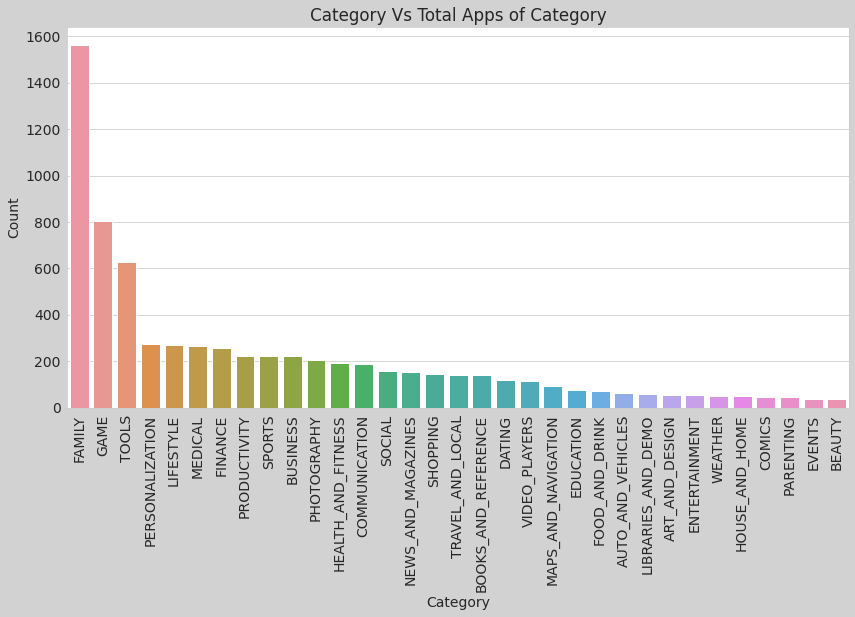

In [256]:
# setting up data for chart and visualize

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.ylabel("Number of application of Category")
plt.xlabel("Category")
plt.title("Category Vs Total Apps of Category")
sns.barplot(category_counts.Category, category_counts.Count)
plt.show()

# 5.2 - Free Vs Paid Applications

**5.2.1 - Data Analysis and Exraction**

In [257]:
# first we compare and see data of column App and Type
play_store[['App','Type']]

,App,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free
3,Sketch - Draw & Paint,Free
4,Pixel Draw - Number Art Coloring Book,Free
5,Paper flowers instructions,Free
...,...,...
10833,Chemin (fr),Free
10834,FR Calculator,Free
10836,Sya9a Maroc - FR,Free
10837,Fr. Mike Schmitz Audio Teachings,Free


In [258]:
# By seeing the unique values we can determine which type of visualization suits the most over App
play_store['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [259]:
# total available rows of Type column 
total_rows = play_store['Type'].size
total_rows


# total number of free app in Type column 
free_app_total = play_store.Type[play_store['Type'] == 'Free'].count()
free_app_total


# total number of paid app in Type column 

paid_app_total = play_store.Type[play_store['Type'] == 'Paid'].count()
paid_app_total


# free_app_total in percentage  
percentage_of_free = free_app_total * 100 /total_rows   
percentage_of_free = float("{:.2f}".format(percentage_of_free))


# paid_app_total in percentage  
percentage_of_paid = paid_app_total * 100 /total_rows
percentage_of_paid = float("{:.2f}".format(percentage_of_paid))

**5.2.2 - Data Visualization**

In [260]:
# defining parameter for chart

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#F5F9F9'

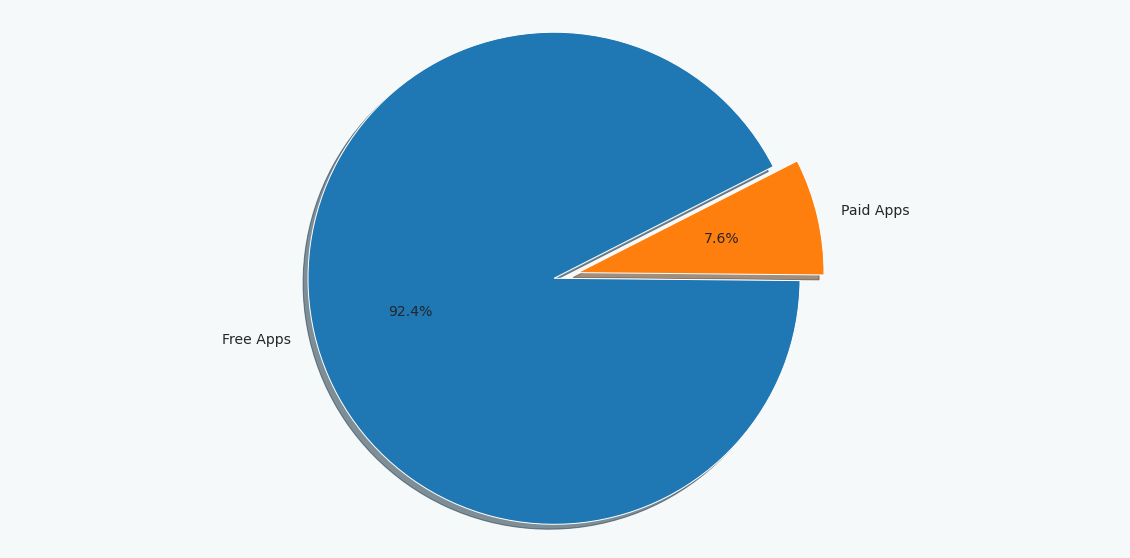

In [261]:
# store both percentages
percentage_both = [percentage_of_free,percentage_of_paid]

# Pie chart
labels = 'Free Apps', 'Paid Apps'
sizes = percentage_both
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=27)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#5.3 - Top App's Category whose Rating Above 4 and Below or Equal 1. 

**5.3.1 - Data Analysis and Extraction**

In [262]:
# data of Category and Rating
play_store[['Category','Rating']]

,Category,Rating
0,ART_AND_DESIGN,4.1
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
5,ART_AND_DESIGN,4.4
...,...,...
10833,BOOKS_AND_REFERENCE,4.8
10834,FAMILY,4.0
10836,FAMILY,4.5
10837,FAMILY,5.0


**5.3.1.1 -  App Rating Above 4**


In [263]:
# making columns data relavent to rating > 4
rating_above_4 = play_store[play_store['Rating'] > 4]
top_app_and_rating = rating_above_4[['Category','App','Rating']]    # here we includes 3 column for further use


# here we counts total apps which has rating over 4 within it's category
totalapp_with_category = top_app_and_rating.Category.value_counts().reset_index().rename(columns={'Category':'count_of_top_most_rating','index':'Category'}).sort_values(by='count_of_top_most_rating', ascending=False)
totalapp_with_category

,Category,count_of_top_most_rating
0,FAMILY,1089
1,GAME,606
2,TOOLS,372
3,PERSONALIZATION,235
4,MEDICAL,181
5,FINANCE,172
6,SPORTS,162
7,LIFESTYLE,162
8,PRODUCTIVITY,153
9,BUSINESS,141




**5.3.1.2 -  App rating below and equals to 1**  



In [264]:
# making columns data relavent to rating < 1
rating_below_1 = play_store[play_store['Rating'] <= 1]

low_app_and_rating = rating_below_1[['Category','App','Rating']]    # here we include 3 column for further use

# here we counts total apps which has rating equals to 1 within it's category
total_app_with_category = low_app_and_rating.Category.value_counts().reset_index().rename(columns={'Category':'count_of_top_lowest_rating','index':'Category'}).sort_values(by='count_of_top_lowest_rating', ascending=True)
total_app_with_category

,Category,count_of_top_lowest_rating
4,DATING,1
5,GAME,1
6,PRODUCTIVITY,1
7,COMMUNICATION,1
8,BUSINESS,1
3,FINANCE,2
0,FAMILY,3
1,MEDICAL,3
2,TOOLS,3


In [265]:
# here we concate two data columns for associate with Category column
total_rating_data=pd.concat([totalapp_with_category,total_app_with_category]).sort_values("Category")
total_rating_data


,Category,count_of_top_most_rating,count_of_top_lowest_rating
22,ART_AND_DESIGN,48.0,NaN
26,AUTO_AND_VEHICLES,37.0,NaN
32,BEAUTY,27.0,NaN
15,BOOKS_AND_REFERENCE,110.0,NaN
8,BUSINESS,NaN,1.0
9,BUSINESS,141.0,NaN
30,COMICS,31.0,NaN
7,COMMUNICATION,NaN,1.0
13,COMMUNICATION,116.0,NaN
4,DATING,NaN,1.0


In [266]:
# here we replace NaN values from 'total_rating_data' for fill 0 for easy ploting.
total_rating_data = total_rating_data.replace(np.NaN,0)
total_rating_data

,Category,count_of_top_most_rating,count_of_top_lowest_rating
22,ART_AND_DESIGN,48.0,0.0
26,AUTO_AND_VEHICLES,37.0,0.0
32,BEAUTY,27.0,0.0
15,BOOKS_AND_REFERENCE,110.0,0.0
8,BUSINESS,0.0,1.0
9,BUSINESS,141.0,0.0
30,COMICS,31.0,0.0
7,COMMUNICATION,0.0,1.0
13,COMMUNICATION,116.0,0.0
4,DATING,0.0,1.0


**5.3.2 - Data Visualization**

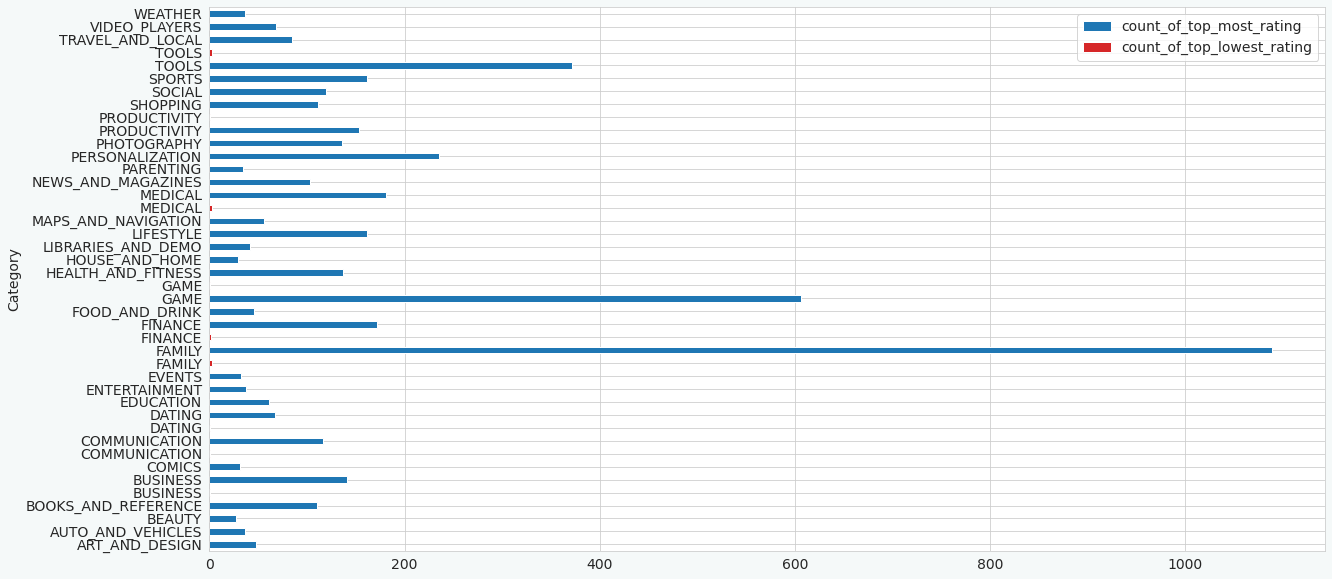

In [267]:
# graph generated based on Rating above 4 and equal or lower to 1.
bar_colors = ['tab:blue', 'tab:red']
total_rating_data.plot(x="Category", y=["count_of_top_most_rating","count_of_top_lowest_rating"], kind="barh", stacked=True,figsize=(20,10),color=bar_colors)
plt.show()

# as we can see their is very low data of rating below or equals 1 so it's like negligible and can't even appear on graph.

# 5.4 - 10 Most reviewed applications list.

**5.4.1 - Data Analysis and Extraction**

In [268]:
play_store[['App','Reviews']].head(10)

,App,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,159
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510
3,Sketch - Draw & Paint,215644
4,Pixel Draw - Number Art Coloring Book,967
5,Paper flowers instructions,167
6,Smoke Effect Photo Maker - Smoke Editor,178
7,Infinite Painter,36815
8,Garden Coloring Book,13791
9,Kids Paint Free - Drawing Fun,121
10,Text on Photo - Fonteee,13880


In [269]:
# getting top 10 data of app reviews
most_review_apps = play_store[['App','Reviews']].head(10).sort_values('Reviews',ascending=False)
most_review_apps

,App,Reviews
3,Sketch - Draw & Paint,215644
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510
7,Infinite Painter,36815
10,Text on Photo - Fonteee,13880
8,Garden Coloring Book,13791
4,Pixel Draw - Number Art Coloring Book,967
6,Smoke Effect Photo Maker - Smoke Editor,178
5,Paper flowers instructions,167
0,Photo Editor & Candy Camera & Grid & ScrapBook,159
9,Kids Paint Free - Drawing Fun,121


**5.4.2 - Data Visualization**

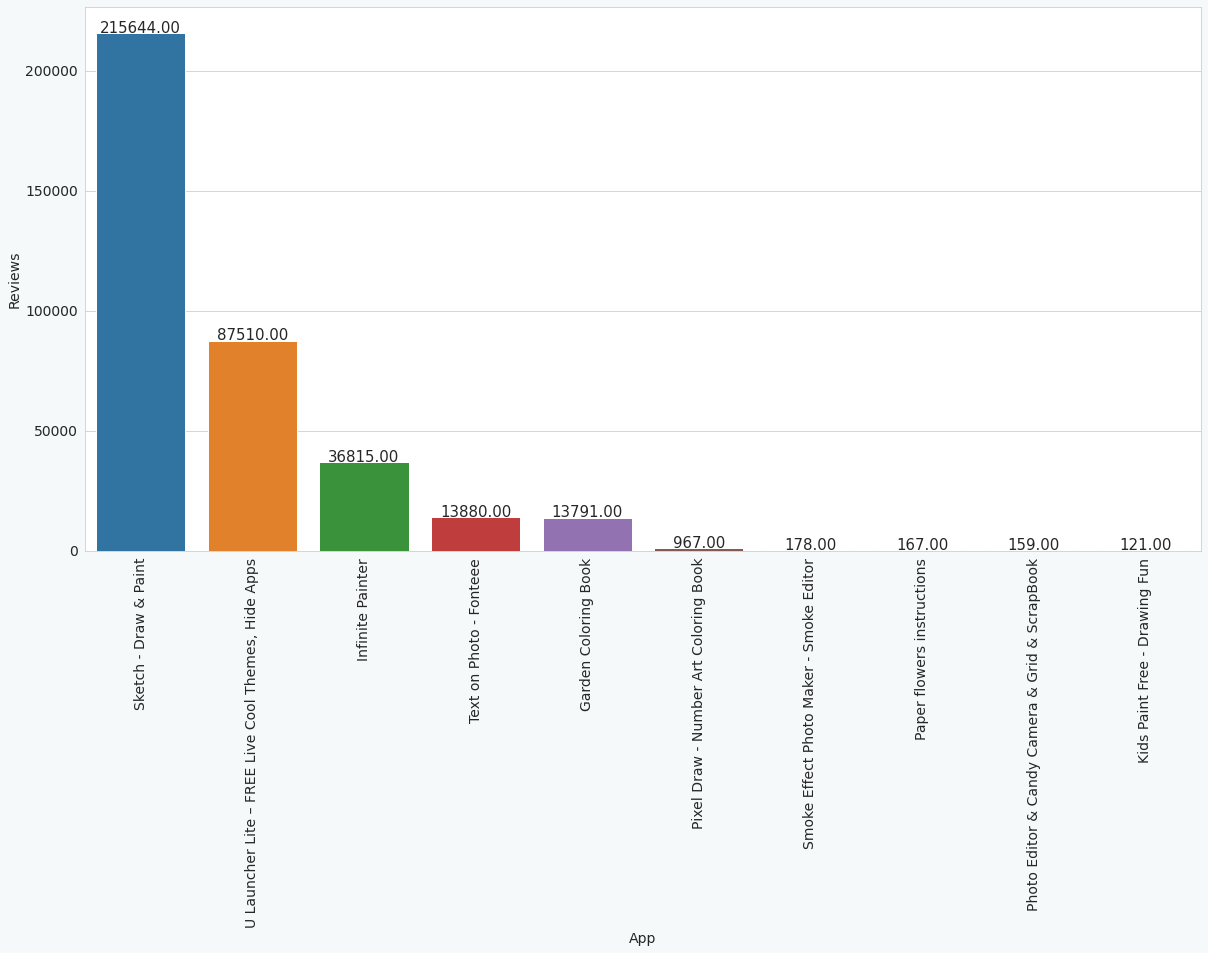

In [270]:
# store data for cordinates
x=most_review_apps.App
y=most_review_apps.Reviews

# setting up bars
plots = sns.barplot(x=x, y=y)
plt.xticks(rotation=90)

# Iterrating over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 5),
				textcoords='offset points')
plt.show()


# 5.5 -  Highest Downloaded Aplications.


**5.5.1 - Data Analysis and Extraction**

In [271]:
top_20_installs = play_store[['App','Installs']].sort_values(by="Installs",ascending=False).head(20)
top_20_installs

,App,Installs
3896,Subway Surfers,1000000000
9844,Google News,1000000000
5596,Samsung Health,500000000
4048,Dropbox,500000000
3879,Pou,500000000
3994,Candy Crush Saga,500000000
4041,Temple Run 2,500000000
4566,SHAREit - Transfer & Share,500000000
4222,imo free video calls and chat,500000000
3971,UC Browser - Fast Download Private & Secure,500000000


**5.5.2 - Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


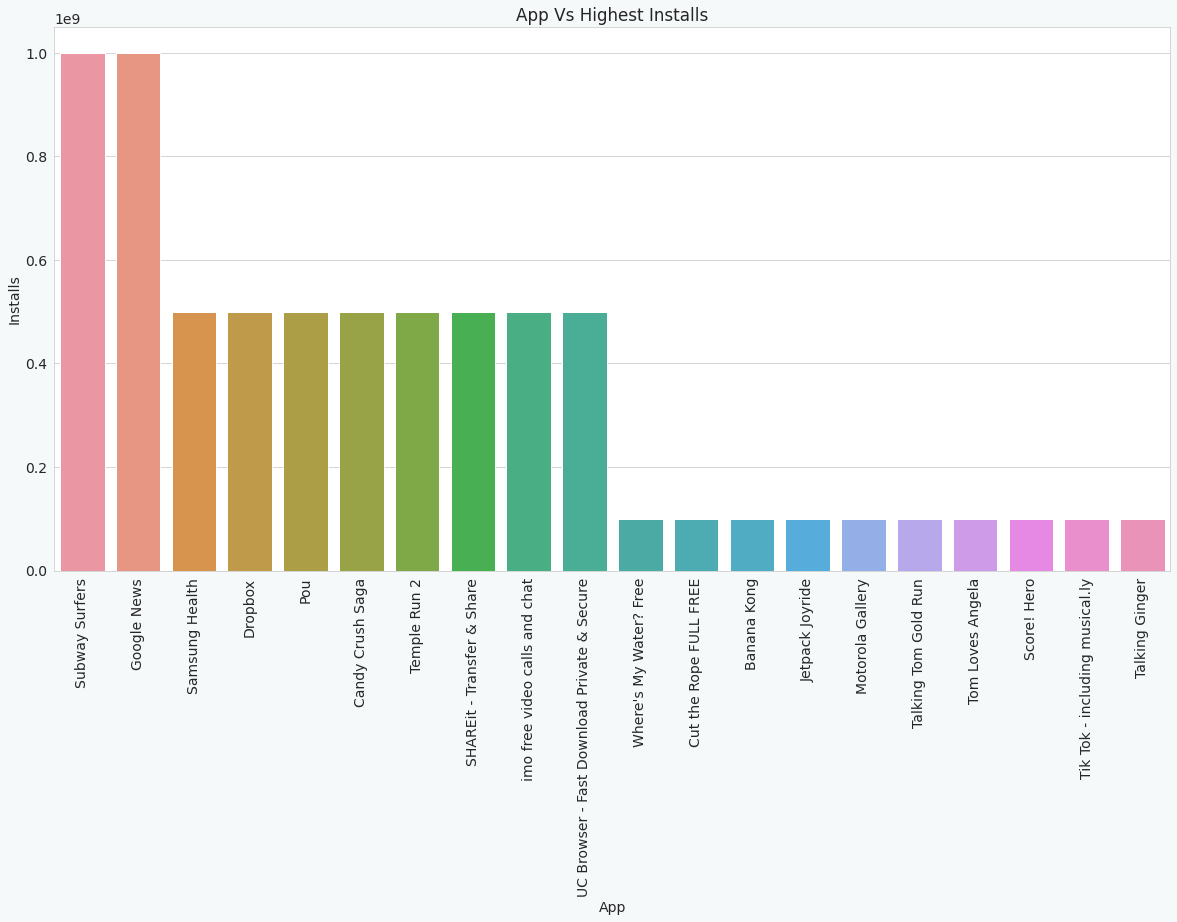

In [272]:
# setting up X,y cordinates
x = top_20_installs.App
y = top_20_installs.Installs

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Application")
plt.ylabel("Number of Installs of Application")
plt.title("App Vs Highest Installs")
sns.barplot(x,y)
plt.show()


# as we can see on left right corner it's 1e9 = 1000000000 = 1 billion ,graph can not visualise this huge number so it takes parameters on its own.

#5.6 - Top 15 App according to Genres.

**5.6.1 - Data Analysis and Extraction**

In [273]:
# as we know App belong from Genres so, we groupby them first 
play_store.groupby(['Genres','App']).agg({'App':'count'})

# by the result we have to counts total app belong to Genres and shows top Genres which has maximum Apps

App
Genres App                                
Action 2-Player Co-op Zombie Shoot       1
       211:CK Lite                       1
       AE Angry Chef                     1
       AE City Jump                      1
       AE Jewels                         1
...                                    ...
Word   Word Crossy - A crossword game    1
       Word Hunt                         1
       Word Link                         1
       Word Search multilingual          1
       Wordscapes                        1

[7021 rows x 1 columns]

In [274]:
top_genres = play_store['Genres'].value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'}).head(15)
top_genres

,Genres,Count
0,Tools,627
1,Entertainment,417
2,Education,391
3,Action,276
4,Personalization,274
5,Lifestyle,268
6,Medical,267
7,Finance,258
8,Sports,227
9,Productivity,223


**5.6.2 - Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


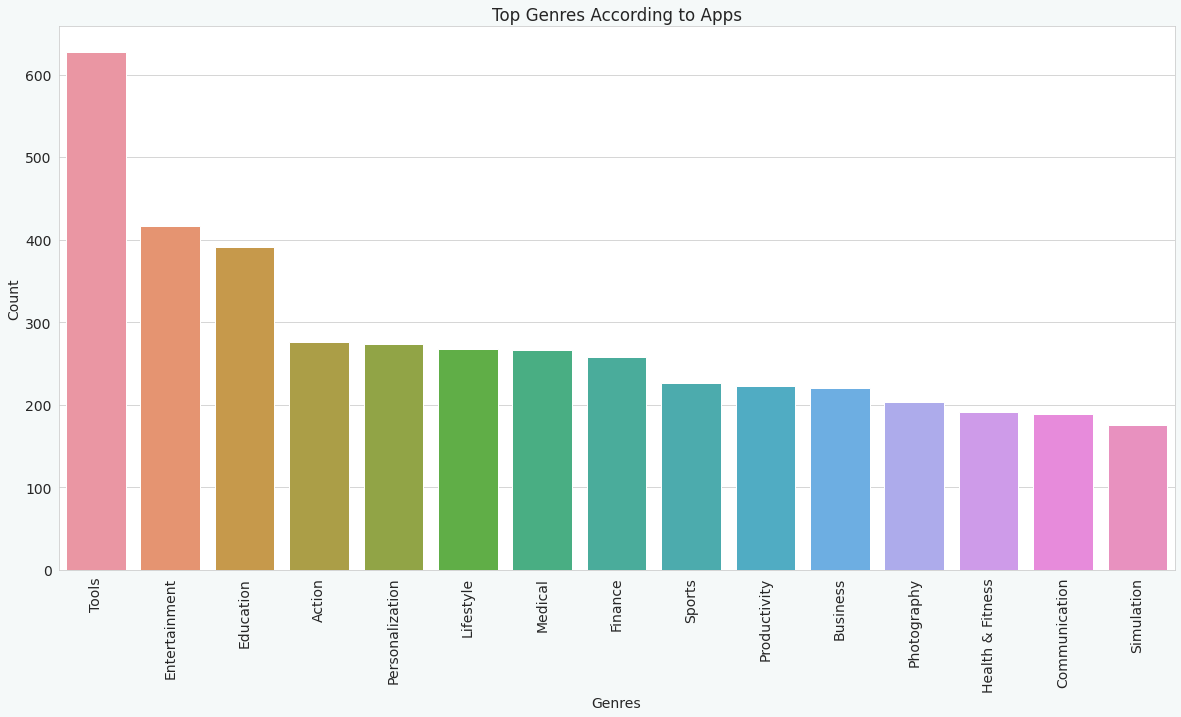

In [275]:
# setting up X,y cordinates
x = top_genres.Genres
y = top_genres.Count

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Application belongs to Genres")
plt.title("Top Genres According to Apps")
sns.barplot(x,y)
plt.show()

# 5.7 - Category of application with it's counts and Type of it.(Free/Paid)

**5.7.1 - Data Analysis and Extraction**

In [306]:
# first we compare and see data of column App and Type
play_store[['App','Type']]

,App,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free
3,Sketch - Draw & Paint,Free
4,Pixel Draw - Number Art Coloring Book,Free
5,Paper flowers instructions,Free
...,...,...
10833,Chemin (fr),Free
10834,FR Calculator,Free
10836,Sya9a Maroc - FR,Free
10837,Fr. Mike Schmitz Audio Teachings,Free


In [307]:
# total available rows of Type column 
total_rows = play_store['Type'].size
total_rows

# total number of free app in Type column 
total_free_apps = play_store[['Category','App','Type']][play_store['Type'] == 'Free']
total_free_apps.App.count()

# total number of paid app in Type column 
total_paid_apps = play_store[['Category','App','Type']][play_store['Type'] == 'Paid']
total_paid_apps.App.count()

537

In [321]:
# free app and it's category 

free_app_cat = total_free_apps.Category.value_counts().reset_index().rename(columns={'Category':'Free_App','index':'Category'})
free_app_cat

,Category,Free_App
0,FAMILY,1417
1,GAME,729
2,TOOLS,572
3,LIFESTYLE,253
4,FINANCE,245
5,MEDICAL,214
6,BUSINESS,213
7,PERSONALIZATION,213
8,PRODUCTIVITY,209
9,SPORTS,203


In [322]:
# paid app and it's category 
paid_app_cat = total_paid_apps.Category.value_counts().reset_index().rename(columns={'Category':'Paid_App','index':'Category'})
paid_app_cat

,Category,Paid_App
0,FAMILY,145
1,GAME,74
2,PERSONALIZATION,61
3,TOOLS,55
4,MEDICAL,53
5,SPORTS,20
6,COMMUNICATION,18
7,LIFESTYLE,16
8,PRODUCTIVITY,14
9,FINANCE,13


In [323]:
# here we merge paid and free app count based on it's category
cat_count_free_paid = pd.merge(free_app_cat,paid_app_cat,on="Category")
cat_count_free_paid

,Category,Free_App,Paid_App
0,FAMILY,1417,145
1,GAME,729,74
2,TOOLS,572,55
3,LIFESTYLE,253,16
4,FINANCE,245,13
5,MEDICAL,214,53
6,BUSINESS,213,8
7,PERSONALIZATION,213,61
8,PRODUCTIVITY,209,14
9,SPORTS,203,20


**5.7.2 - Data Visualization**

In [330]:
# defining parameter for chart

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#C0C0C0'

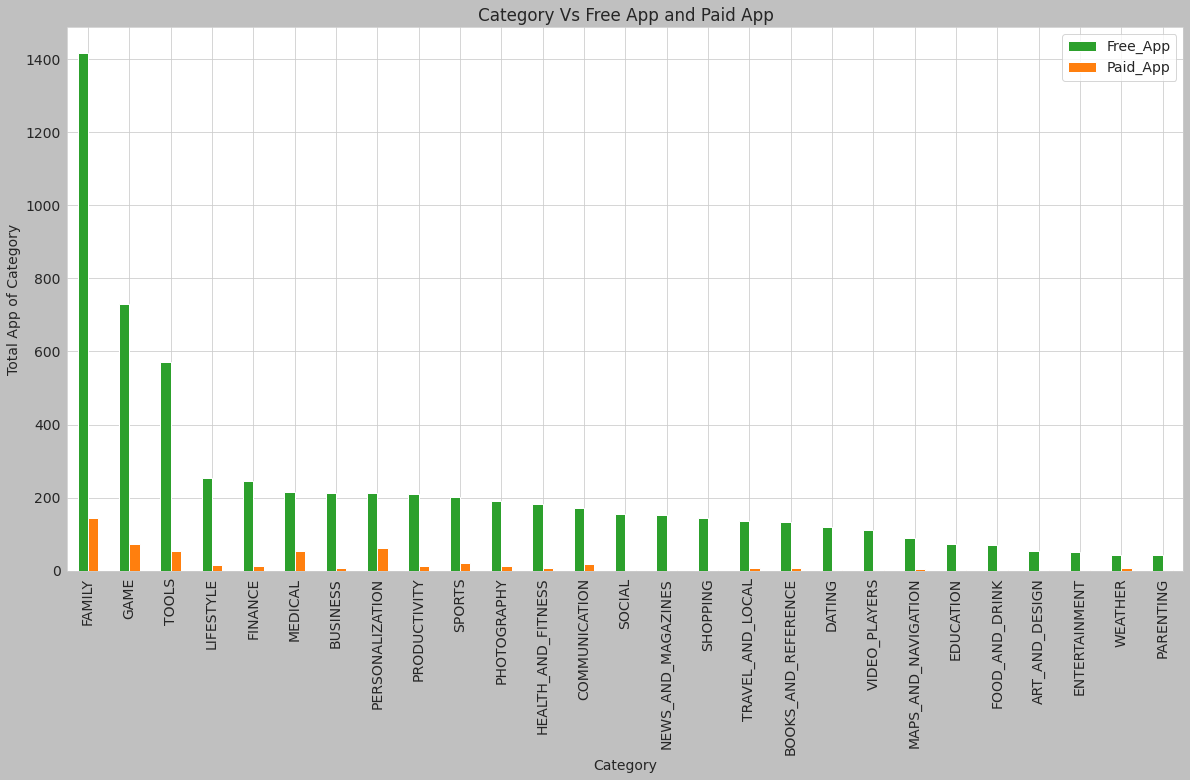

In [338]:
# visualising both free app and paid app with help of bar
bar_colors = ['tab:green', 'tab:orange']
cat_count_free_paid.plot(x="Category", y=["Free_App","Paid_App"], kind="bar", stacked=False,figsize=(20,10),color=bar_colors)
plt.xlabel("Category")
plt.ylabel("Total App of Category")
plt.title("Category Vs Free App and Paid App")


plt.show()

# 5.8 - Histogram of Size

**5.8.1 - Data analysis and Extraction**

In [ ]:
# As we know the data of Size is the size of Application in MB 
play_store[['App','Size']].sort_values("Size",ascending=False).head(100)

In [ ]:
# how many times app occurs which has same MB Size  
play_store['Size'].value_counts()

**5.8.2 - Data Visualization**

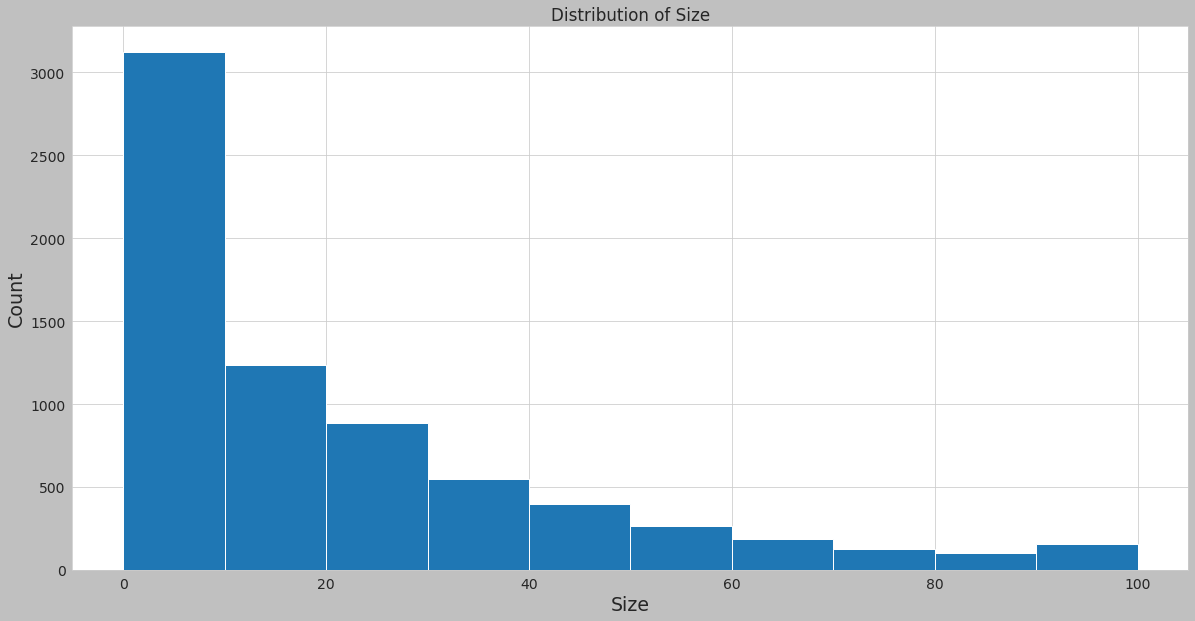

In [354]:
plt.title("Distribution of Size")
plt.hist(play_store['Size'])
plt.xlabel("Size",fontsize=19)
plt.ylabel("Counts",fontsize=19)
plt.show()

# by this graph we can conclude that there are 3000 ups applications which has Size between 0-10 MB, and so on...... 

# 5.9 - Corelation between Columns

**5.9.1 - Data Analysis and Visualization**

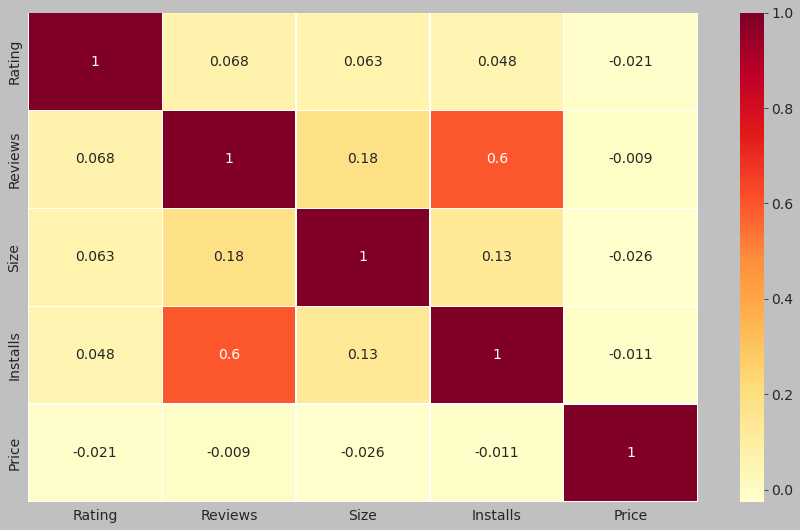

In [361]:
cor_of_col = play_store.corr()  
f, ax = plt.subplots(figsize =(15, 9))
sns.heatmap(cor_of_col, ax = ax,cmap ="YlOrRd",annot = True, linewidths = 0.2)


# Installs & Reviews are highly positive correlated. The reason maybe those application got gighest no of installs they also got highest no of review.